### Svar Exercises-00 Panda syntax

In [162]:
import pandas as pd

cities ={"Kommun": ["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Invånare":[347949, 975551, 233839, 583056]}
df_cities = pd.DataFrame(data=cities)
df_cities_sorted = df_cities.sort_values(by= "Invånare", ascending=False)
df_cities_procent = pd.DataFrame(data=cities, columns=["Kommun", "Invånare", "Procent av invånare"])
df_cities_procent["Procent av invånare"] = (df_cities_procent["Invånare"] / 10379295)*100

print(f"{df_cities.Kommun} \n")    
print(f"{df_cities.iloc[3]}\n")
print(f"{df_cities_sorted}\n")
print(f"{df_cities_sorted.iloc[:3]}\n")
print(df_cities_procent)



0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object 

Kommun      Göteborg
Invånare      583056
Name: 3, dtype: object

      Kommun  Invånare
1  Stockholm    975551
3   Göteborg    583056
0      Malmö    347949
2    Uppsala    233839

      Kommun  Invånare
1  Stockholm    975551
3   Göteborg    583056
0      Malmö    347949

      Kommun  Invånare  Procent av invånare
0      Malmö    347949             3.352338
1  Stockholm    975551             9.399010
2    Uppsala    233839             2.252937
3   Göteborg    583056             5.617491


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

komtopp = pd.read_excel("../data/komtopp50_2020.xlsx",sheet_name="Totalt", header=[6])
komtopp = komtopp.rename(columns= {2020:"Rang 2020", 2019:"Rang 2019", "Unnamed: 2": "Kommun", "2020.1":"Folkmängd 2020", "2019.1":"Folkmängd 2019", "%": "Förändring"})
komtopp_sorted = komtopp.sort_values(by= "Rang 2020").reset_index(drop=True)
komtopp_top5 = komtopp_sorted.head().reset_index(drop=True)
komtopp_bottom5 = komtopp_sorted.tail().reset_index(drop=True)
population2019 = komtopp["Folkmängd 2019"].sum()
population2020 = komtopp["Folkmängd 2020"].sum()


print(f"{komtopp.head()}\n")
print(f"{komtopp_sorted.head()}\n")
print(f"Top 5 \n{komtopp_top5}\n")
print(f"Befolking 2019: {population2019} invånare\n")
print(f"Befolking 2020: {population2020} invånare\n")



   Rang 2020  Rang 2019    Kommun  Folkmängd 2020  Folkmängd 2019  Förändring
0         83         84       Ale           31868           31402    1.483982
1         64         64  Alingsås           41602           41420    0.439401
2        123        123   Alvesta           20224           20134    0.447005
3        255        255     Aneby            6821            6848   -0.394276
4        169        167    Arboga           14039           14087   -0.340740

   Rang 2020  Rang 2019     Kommun  Folkmängd 2020  Folkmängd 2019  Förändring
0          1          1  Stockholm          975551          974073    0.151734
1          2          2   Göteborg          583056          579281    0.651670
2          3          3      Malmö          347949          344166    1.099179
3          4          4    Uppsala          233839          230767    1.331213
4          5          5  Linköping          164616          163051    0.959822

Top 5 
   Rang 2020  Rang 2019     Kommun  Folkmängd 202

C:\Users\User\AppData\Local\Temp\ipykernel_15684\3377945115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_15684\3377945115.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


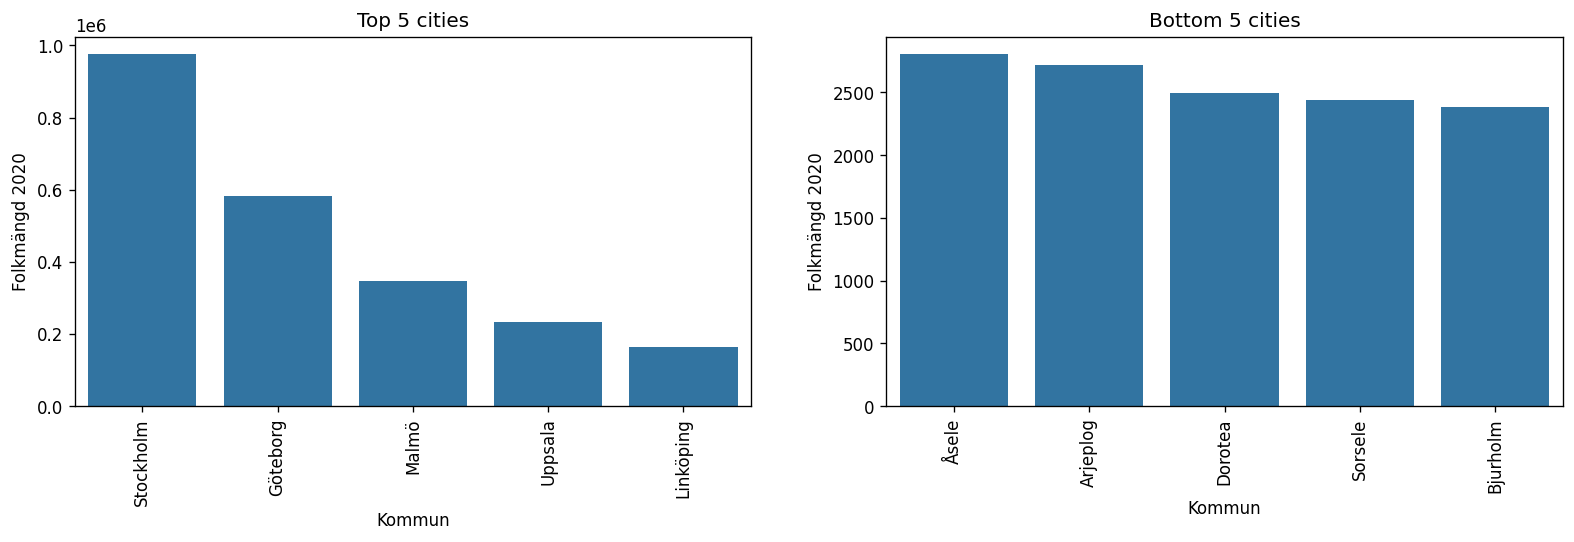

In [164]:
fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))

titles = ["Top 5 cities", "Bottom 5 cities"]
data_frames = [komtopp_top5, komtopp_bottom5]
x_column = komtopp_top5["Kommun"], komtopp_bottom5["Kommun"]

for i, (data, title) in enumerate(zip(data_frames, titles)): 
    sns.barplot(data = data, x=x_column[i], y="Folkmängd 2020", ax = axes[i])
    axes[i].set(title=title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)


In [209]:
def make_df(path, sheet, line, given_colums):
    data = pd.read_excel(path ,sheet_name=sheet, header=[line])
    data = data.rename(columns= given_colums)
    data = data.assign(Kön= sheet)
    return data

def merge_slice (df1, df2, i1, i2):
    merge_df = pd.concat([df1, df2])
    merge_df = merge_df.loc[:, i1:i2]
    return merge_df

def total_pop(df, colum):
    
        population.update = {colum :df1[colum].sum + df2[colum].sum}
    df_pop = pd.DataFrame({"Kommun":df1.iloc["Kommun", "Tot pop 2020": population["Folkmängd 20202"], "Tot pop 2019": population["Folkmängd 20219"]]})




path = "../data/komtopp50_2020.xlsx"
given_colums =  {2020:"Rang 2020", 2019:"Rang 2019", "Unnamed: 2": "Kommun", "2020.1":"Folkmängd 2020", "2019.1":"Folkmängd 2019", "%": "Förändring"}
male_df = make_df(path, "Män", 6, given_colums)
female_df = make_df(path, "Kvinnor", 6, given_colums)
female_male = merge_slice(male_df, female_df, "Kommun", "Kön")

#print(f"{male_df.head()}\n")
#print(f"{female_df.head()}\n")
print(f"{female_male}\n")
    

IndentationError: expected an indented block after 'for' statement on line 14 (3244118376.py, line 15)